# Data Cleaning, Analysis, and Visualization on Retail Sales Data
This notebook performs data cleaning, analysis, and visualization on retail sales data. It answers key business questions related to total sales, customer demographics, and spending behavior.

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

## Load Data
We load the dataset to understand its structure by viewing the first and last few rows, as well as a summary of the data.

In [13]:
# Load the dataset
sales_data = pd.read_csv('Week 3 retail_sales_dataset.csv')
sales_data.head()
#sales_data.tail()
#sales_data.info()
#sales_data.describe()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/23,CUST001,Male,34.0,Beauty,3,50,150
1,2,2/27/23,CUST002,Female,26.0,Clothing,2,500,1000
2,3,1/13/23,CUST003,Male,50.0,Electronics,1,30,30
3,4,5/21/23,CUST004,Male,37.0,Clothing,1,500,500
4,5,5/6/23,CUST005,Male,30.0,Beauty,2,50,100


## Step 1: Handling Missing and Duplicate Data
We begin by checking for missing data and duplicates, then proceed to clean the dataset by filling or removing missing values and duplicates.

In [14]:
# Check for missing values
print(sales_data.isna().sum())

# Replace empty strings or 'NaN' with NaN
sales_data.replace('', np.nan, inplace=True)
sales_data.replace('NaN', np.nan, inplace=True)

# # Fill missing values in Age with the median
sales_data['Age'].fillna(sales_data['Age'].median(), inplace=True)

# Check for missing values
print(sales_data.isna().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 2
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [17]:
# Handle duplicates
# Check for duplicates
duplicates_count = sales_data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates_count}')

# Remove duplicates
sales_data.drop_duplicates(inplace=True)
print(f'Number of duplicate rows after removal: {sales_data.duplicated().sum()}')

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


## Step 2: Identifying Revenue Decline by Product Category
We calculate total sales for each product category and visualize the spread of total amount spent by category using a box plot.

A box plot visually represents the distribution of a dataset by showing its spread, central tendency, and potential outliers. The box spans the interquartile range (IQR), containing the middle 50% of the data, with a line inside the box representing the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, and points beyond the whiskers are considered outliers. Symmetry or skewness is indicated by the length of the whiskers, showing how the data is distributed, with skewness revealed by longer whiskers on one side.

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


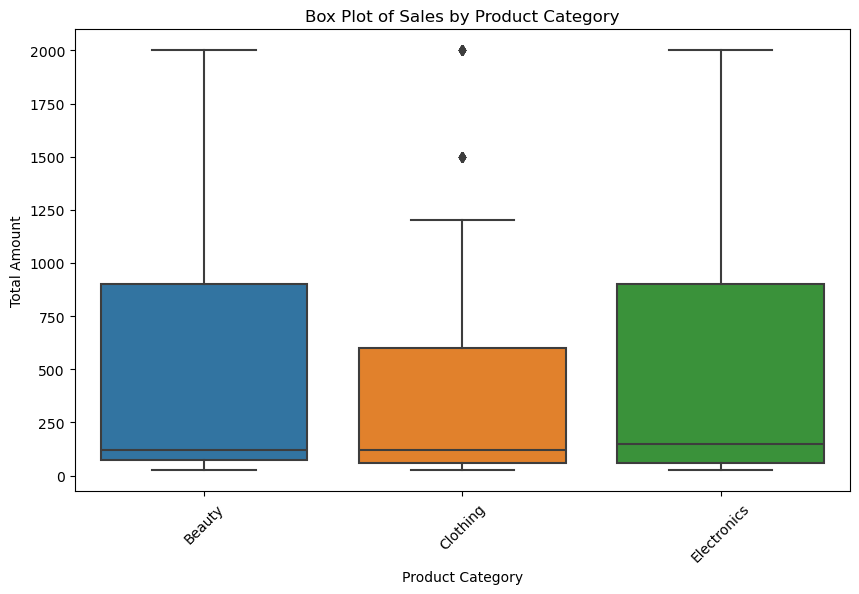

In [21]:
# Calculate total sales per category
total_sales_per_category = sales_data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print(total_sales_per_category)

# Add a new column 'Log_Total_Amount' to the dataframe with the log of 'Total Amount'
sales_data['Log Total Amount'] = np.log(sales_data['Total Amount'] + 1)  # Adding 1 to avoid log(0)

# Box plot to visualize the spread of total amount spent by category
plt.figure(figsize=(10,6))
sns.boxplot(x='Product Category', y='Total Amount', data=sales_data)
plt.title('Box Plot of Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

## Step 3: Customer Demographics and Spending Behavior
We analyze the average age of customers for each product category and create a scatter plot matrix to explore relationships between Age, Quantity, and Total Amount.

A scatter plot matrix displays pairwise relationships between multiple variables in a dataset. Each cell in the matrix contains a scatter plot comparing two variables, helping to visualize patterns, correlations, or trends between them. The diagonal of the matrix typically shows each variable's distribution, often as histograms or density plots. Scatter plot matrices are useful for identifying relationships, clustering, or outliers, providing an overview of how variables interact across the dataset.

Average Customer Age per Category:
Product Category
Clothing       41.991453
Electronics    41.736842
Beauty         40.351792
Name: Age, dtype: float64


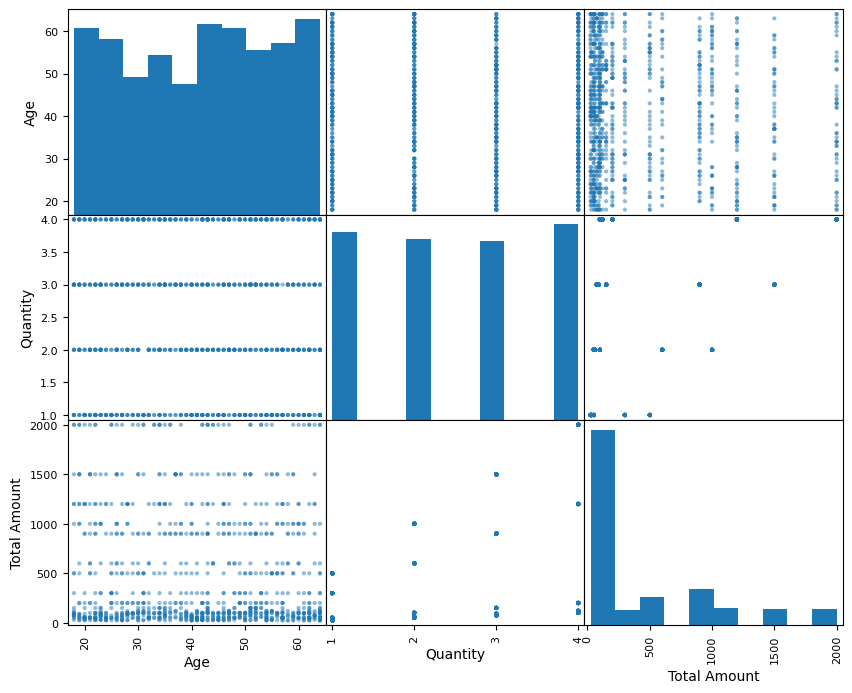

In [22]:
# Calculate average age per category
average_age_per_category = sales_data.groupby('Product Category')['Age'].mean().sort_values(ascending=False)
print('Average Customer Age per Category:')
print(average_age_per_category)

# Scatter matrix to explore relationships between Age, Quantity, and Total Amount
scatter_matrix(sales_data[['Age', 'Quantity', 'Total Amount']], figsize=(10,8))
plt.show()

## Challenge: Create a Connected Scatter Plot
Try to create a connected scatter plot using Date and Total Amount. Use our dataframe (not data), and plot the dataset.

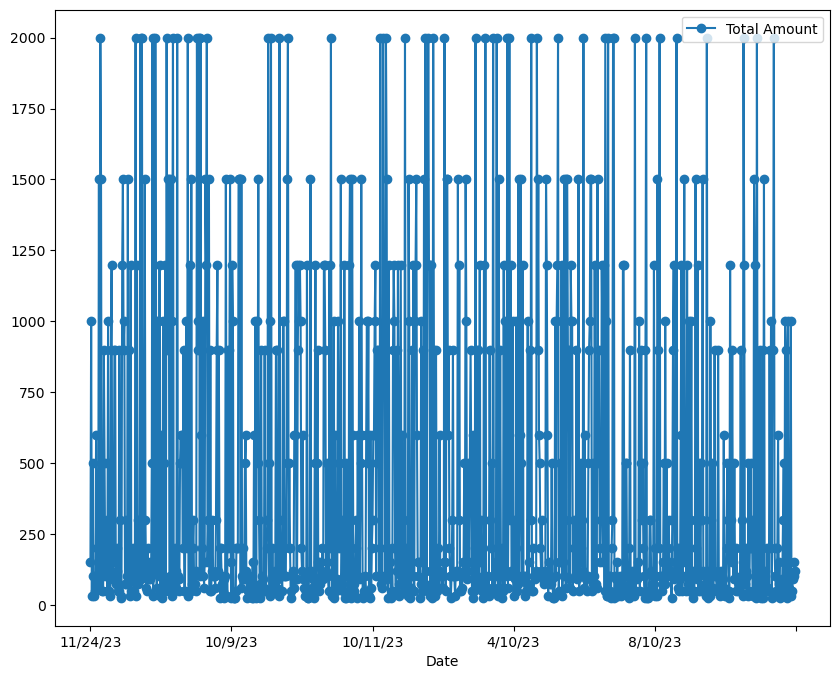

C:\Users\freed\AppData\Local\Temp\ipykernel_37768\1668443127.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Date'] = pd.to_datetime(sales_data['Date'])


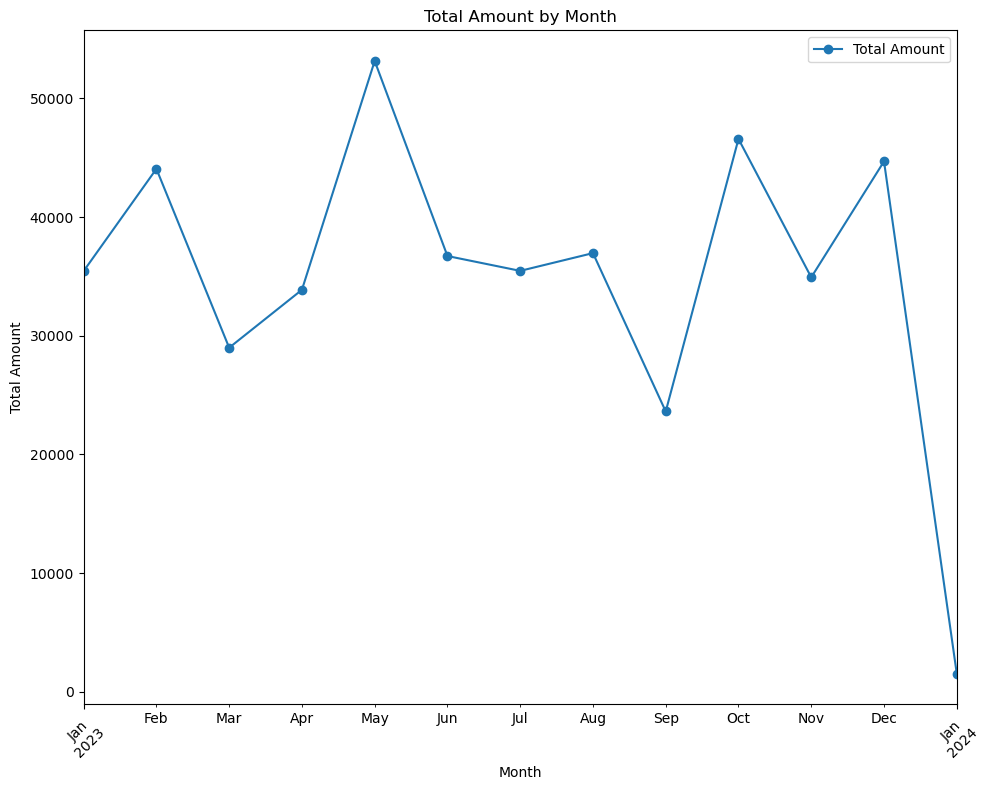

In [26]:
# Uncomment the code below to create a connected scatter plot with the date and total amount. Our initial dataframe is called sales_data - not data.
sales_data.plot(x='Date', y='Total Amount', kind='line', marker='o', figsize=(10,8))
plt.show()

# Maybe just charting Date and Total Amount isn't very helpful?

#Let's try consider simplifying by computing monthly averages!
#Convert the 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

#Create a new column for the month (Year and Month)
sales_data['Month'] = sales_data['Date'].dt.to_period('M')

#Group by the 'Month' column and sum the 'Total Amount'
monthly_totals = sales_data.groupby('Month')['Total Amount'].sum().reset_index()

#Plot the monthly total sales
monthly_totals.plot(x='Month', y='Total Amount', kind='line', marker='o', figsize=(10,8))
plt.title('Total Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 4: Gender-Based Spending Analysis
We calculate total spending by gender and explore spending behavior by gender.

In [27]:
# Calculate total spending by gender
total_spending_by_gender = sales_data.groupby('Gender')['Total Amount'].sum()
print('Total Spending by Gender:')
print(total_spending_by_gender)

Total Spending by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


## Challenge: Create a Bar Plot for Gender and Total Spending
Create a bar plot to explore the total spending by gender (Gender and Total Amount). Our dataframe is sales_data and not data.

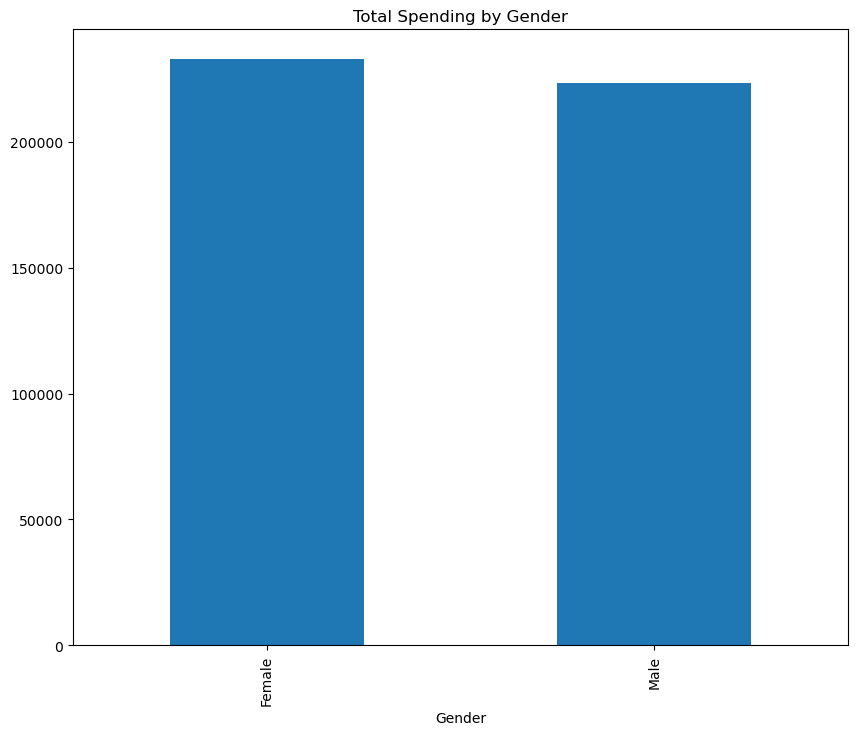

In [30]:
# Uncomment the code below to create a bar plot 
sales_data.groupby('Gender')['Total Amount'].sum().plot(kind='bar', figsize=(10,8))
plt.title('Total Spending by Gender')
plt.show()

## Step 5: Exploring the Impact of Discounts
We create a heatmap to visualize correlations between numerical variables like Age, Quantity, and Total Amount.

A correlation heatmap visually represents the strength and direction of relationships between variables in a dataset. Each cell in the heatmap shows a correlation coefficient, typically ranging from -1 to 1, with color intensity indicating the degree of correlation. Positive correlations are closer to 1, while negative correlations are closer to -1. Heatmaps make it easy to identify strong relationships, patterns, or trends between variables at a glance, aiding in feature selection and understanding data interactions.

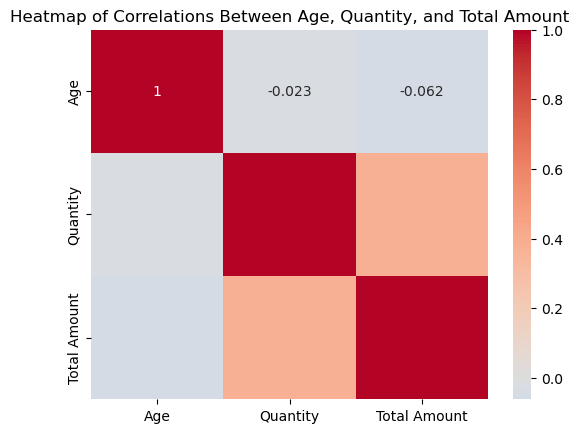

In [32]:
# Correlation heatmap for Age, Quantity, and Total Amount
corr_matrix = sales_data[['Age', 'Quantity', 'Total Amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlations Between Age, Quantity, and Total Amount')
plt.show()

## Challenge: Create Your Own Visualization
Check out these awesome Seaborn (https://seaborn.pydata.org/examples/index.html) and Matplotlib (https://matplotlib.org/stable/plot_types/index.html) websites. 
You can explore different visualizations and maybe find one that interests you.
Drill down into the sample code, try copying it into this file, updating it, and running it.
This dataset may not support all of these, but you can focus on simpler ones first.

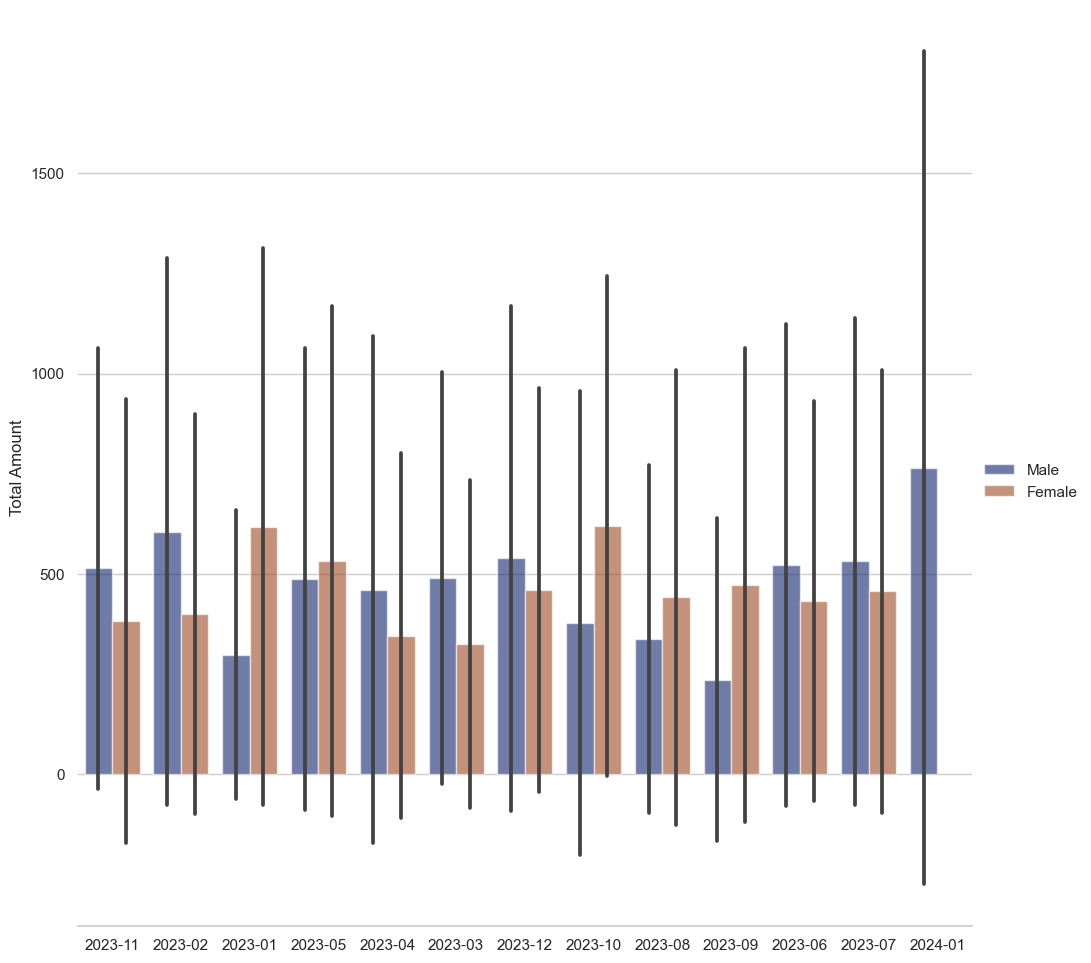

In [38]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=sales_data, kind="bar",
    x="Month", y="Total Amount", hue="Gender",
    errorbar="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("", "Total Amount")
g.legend.set_title("")